In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets,transforms

from torch.utils.data import DataLoader,random_split

import matplotlib.pyplot as plt

import numpy as np

In [2]:
transform = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor()])

In [3]:
dir='pizza_not_pizza'
dataset=datasets.ImageFolder(dir,transform=transform)

In [4]:
tr_q=int(0.8*len(dataset))
te_q=len(dataset)-tr_q

In [5]:
train, test = random_split(dataset, [tr_q, te_q])
train_loader = DataLoader(train,batch_size=32, shuffle=True)
test_loader = DataLoader(test, batch_size=32, shuffle=False)

In [6]:
class Pizza_Not_Pizza(nn.Module):
    
    def __init__(self):
        
        super(Pizza_Not_Pizza,self).__init__()
        
        self.cnn1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,padding=1)
        self.maxpool1=nn.MaxPool2d(kernel_size=2,stride=2)
        self.cnn2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.maxpool2=nn.MaxPool2d(kernel_size=2,stride=2)
        self.linear1 = nn.Linear(64*32*32, 512)
        self.linear2 = nn.Linear(512, 2)
        
    def forward(self,x):
        x = self.maxpool1(F.relu(self.cnn1(x)))
        x = self.maxpool2(F.relu(self.cnn2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [7]:
model=Pizza_Not_Pizza()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [8]:
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/10, Loss: 0.6465
Epoch 2/10, Loss: 0.5794
Epoch 3/10, Loss: 0.5665
Epoch 4/10, Loss: 0.5215
Epoch 5/10, Loss: 0.4851
Epoch 6/10, Loss: 0.4572
Epoch 7/10, Loss: 0.4605
Epoch 8/10, Loss: 0.4339
Epoch 9/10, Loss: 0.4101
Epoch 10/10, Loss: 0.3887


In [10]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

Accuracy on test set: 73.98%


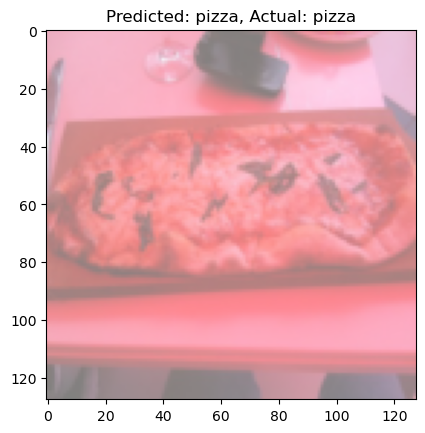

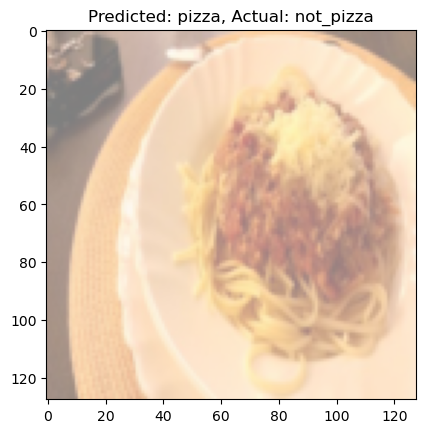

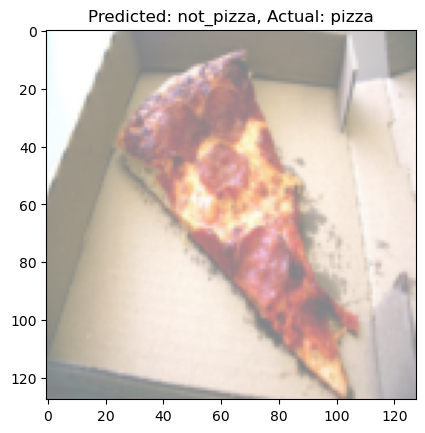

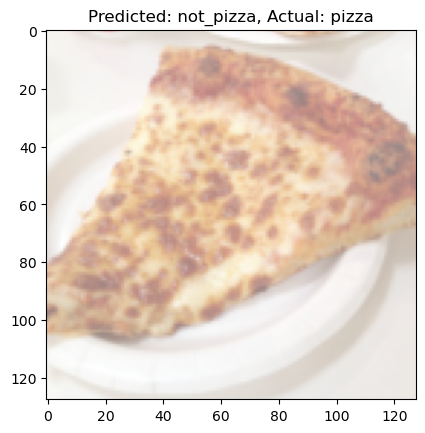

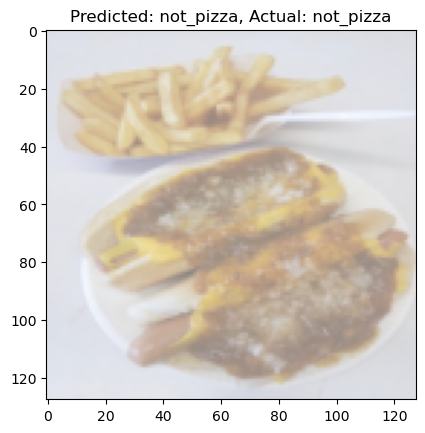

In [17]:
def impic(img, title):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

outputs = model(images)
_, predicted = torch.max(outputs, 1)

for i in range(5):
    impic(images[i], f'Predicted: {dataset.classes[predicted[i]]}, Actual: {dataset.classes[labels[i]]}')